In [1]:
import sys

In [2]:
print(sys.path)
print(sys.executable)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']
/opt/homebrew/anaconda3/envs/optimization_env_munc/bin/python


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd
from munc13 import Munc13, Solver

In [4]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [5]:
parameter_ranges = {
        "kfsr":      {"min": 0.001, "max": 10},   # kfSR uM-1s-1
        #"krsr_nostim":      {"min": 0.1,   "max": 1000}, # krSR_nostim
        "krsr":       {"min": 0.001,   "max": 1000}, # krSR_stim s-1
        "kfmm":      {"min": 0.1, "max": 10},   # kfMM uM-1s-1
        "krmm":      {"min": 0.01,   "max": 10}, # krMM s-1
        "kfmx":      {"min": 0.001, "max": 10},   # kf1x uM-1s-1
        "krmx":      {"min": 0.01,   "max": 1000}, # kr1x s-1
       # "kfc_nostim":      {"min": 0.001, "max": 10},   # kfc_nostim
        "kfc":      {"min": 0.001, "max": 10},   # kfc_stim uM-1s-1
        "krc":      {"min": 0.01, "max": 1000},   # krc
        "kfq":      {"min": 0.001, "max": 10},   # kx2 uM-1s-1
        "krq":      {"min": 0.01,   "max": 1000}, # krx2 s-1
        "eLoop":      {"min": 0.0001,   "max": 10}, # exp(free energy kT units <0).
        "eDF":      {"min": 0.0001,   "max": 10}, # exp(free energy kT units <0).
        "kfdd":     {"min": 0.01,   "max": 1}, # kfdd unimolecular: s-1
        "Sd":     {"min": 0.1,   "max": 10}, # scalar to change on/off kinetics of dimer to cluster
        "stimUpSR":       {"min": 1,   "max": 100}, # stimUpSR: scale factor >1
        "S0":        {"min": 0.001, "max": 5},   # S0 (uM)
        "R0":        {"min": 0.1, "max": 10000},   # R0 (/um^2)
        #"D1":        {"min": 0.05,   "max": 5}, # D1
        #"D1_over_D2":        {"min": 1.5,   "max": 5}, # D2
        "X0":        {"min": 0.01,   "max": 100}, # X0  (/um^2)
        "Q0":       {"min": 0.01,   "max":  100}, # Q0  (/um^2)
       
         
}



    # Order in which the solver will read parameters from a candidate
    # so, e.g. candidate[0] = kfsr.
   
params_to_optimize1 = np.array([
        "kfsr","krsr","kfmm","krmm","kfmx","krmx","kfc","krc","kfq","krq","eLoop","eDF","kfdd","Sd","stimUpSR","S0","R0","X0","Q0"
])
# Instantiate the model and solver
maxTime=1000.0
model = Munc13(parameter_ranges, params_to_optimize1, t_max=maxTime)

Gamma is 333.3333333333333


# define the file to open to read in parameters

In [6]:
path_to_dir = "/Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots"
numberName= 20001
#inputFile = f"Centroid_solutions_Dterm_parameters_{numberName}.csv"
inputFile = f"Top11_solutions_Dterm_parameters_{numberName}.csv"
fileName = f"{path_to_dir}/{inputFile}"
unique_id = 101
print("read file: ", fileName)

read file:  /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/Top11_solutions_Dterm_parameters_20001.csv


In [7]:
imageDir="/Users/margaret/Dropbox/r2025/Munc13/IMAGES"
dir=f"{imageDir}/Data_for_plots"

In [8]:
#read in all solutions in the parameter file.
import pandas as pd

dataF = pd.read_csv(fileName, sep=",", engine="python")
dataF.columns = dataF.columns.str.strip()
#dataF = dataF.sort_values(by="Rank")
print(dataF.shape)
#print(dataF.loc[25])
#store the parameters in the param_cols vector
param_cols = [col for col in dataF.columns if col not in ["Rank", "Fitness"]]
print(param_cols)


(17, 21)
['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfq', 'krq', 'eLoop', 'eDF', 'kfdd', 'Sd', 'stimUpSR', 'S0', 'R0', 'X0', 'Q0']


In [9]:
print("Fitness values: ") 
print(dataF['Fitness'])

Fitness values: 
0     -5.8098
1    -10.3520
2     -6.5024
3     -3.6932
4    -11.9354
5     -3.0535
6     -4.1227
7     -2.0583
8     -3.1867
9     -4.2824
10    -2.2607
11    -8.0537
12    -3.2790
13    -6.1203
14    -4.6734
15    -3.6072
16    -2.8775
Name: Fitness, dtype: float64


# Choose which row in the file to evaluate

In [10]:
whichRow = 10

# solve this model

In [11]:
candidate=dataF[param_cols].iloc[whichRow].values
print('Fitness: ', dataF['Fitness'].iloc[whichRow] )
scaleMX = 10
candidate[4] = candidate[4]*scaleMX
candidate[5] = candidate[5]*scaleMX
scaleC = 1
candidate[6] = candidate[6]*scaleC
candidate[7] = candidate[7]*scaleC
#newX0=0.03
#candidate[17]=newX0
sol, solPost=model.simulate(candidate)
print(dataF.iloc[whichRow])
outputRow=dataF.iloc[whichRow]
#save this parameter set to file with the unique id
outputRow.to_csv(f"{dir}/ParameterSolution_{whichRow}_UsedForPlotting_{unique_id}.csv", index=False)


Fitness:  -2.2607
Rank        0.000000e+00
Fitness    -2.260700e+00
kfsr        2.567300e-01
krsr        5.166000e-02
kfmm        2.094300e+00
krmm        1.512600e-01
kfmx        3.018700e-02
krmx        1.789400e-01
kfc         8.687100e+00
krc         7.086400e-01
kfq         8.785500e-03
krq         3.696600e-01
eLoop       1.467900e-01
eDF         6.091800e-02
kfdd        1.022500e-02
Sd          1.391400e+00
stimUpSR    5.463000e+01
S0          7.202700e-02
R0          3.019700e+00
X0          2.457600e-02
Q0          3.114600e-50
Name: 10, dtype: float64


# solve the dC2A mutant

In [12]:
candidate_dc2a=list(candidate)
candidate_dc2a[2] = 0 #this sets kfmm to zero.
candidate_dc2a[12] = 0 #this sets kfdd to zero (no in cluster transition to 2M->D)
        
mut, mutPost = model.simulate(candidate_dc2a)
  

# Now generate plots to save to file.

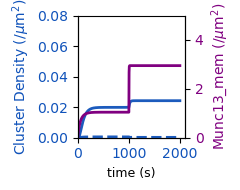

In [13]:
model.plot_time_resolved_density(sol, solPost,f"WT_{unique_id}_{whichRow}")

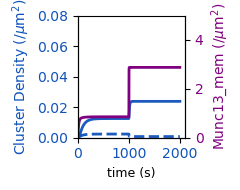

In [14]:
#Plot the same thing for the C2A mutant.
model.plot_time_resolved_density(mut, mutPost, f"C2A_{unique_id}_{whichRow}")

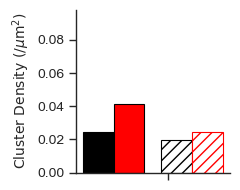

In [15]:
#plot cluster density as a bar plot
model.plot_density_vs_exp(sol, solPost, f"WT_{unique_id}_{whichRow}", whichExp='WT')

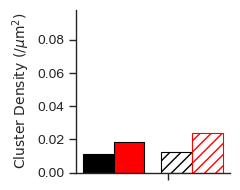

In [16]:
#plot cluster density as a bar plot
model.plot_density_vs_exp(mut, mutPost, f"C2A_{unique_id}_{whichRow}", whichExp='C2A')

In [17]:
colD = ['D', 'Dpost', 'C2AD', 'C2ADpost']
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
D_metrics = pd.DataFrame([metricsD], columns = colD)



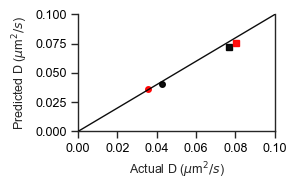

In [18]:
model.plot_diffusion_vs_exp(D_metrics, 0, fileStr=f"_{unique_id}_{whichRow}")

sizes pre stim, and sum:  [np.float64(0.3371729400134904), np.float64(0.5461924068158557), np.float64(0.11419789571137179)]
sizes POST stim, and sum:  [np.float64(0.23036773422595114), np.float64(0.7199674046071286), np.float64(0.04929608210979853)]


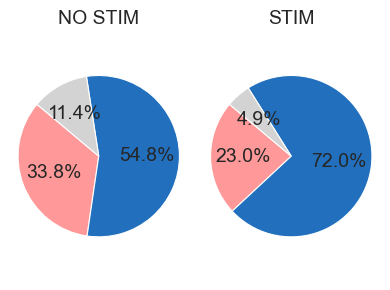

sizes pre stim, and sum:  [np.float64(0.898984768137005), np.float64(0.0), np.float64(0.08791280813340198)]
sizes POST stim, and sum:  [np.float64(0.9490928671875926), np.float64(0.049634215233571075)]


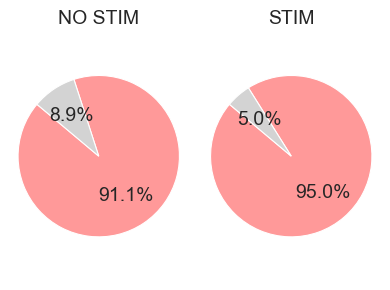

In [19]:
#create pie charts.
model.pie_charts(sol, solPost, [4,3], f"WT_{unique_id}_{whichRow}")
#create pie charts of the mutant.
model.pie_charts(mut, mutPost, [4,3], f"C2A_{unique_id}_{whichRow}")

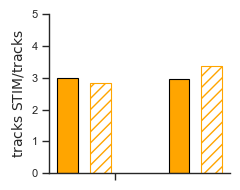

In [20]:
#plot the increase in tracks, experiment vs simulation
model.plot_track_increase_vs_exp(sol, solPost, mut, mutPost, fileStr=f"{unique_id}_row_{whichRow}", figsize=(2.5, 2))


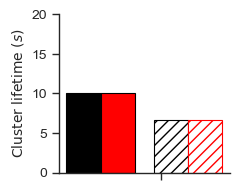

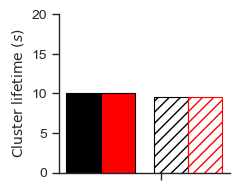

In [21]:
#create a plot comparing the lifetimes before and after stimulation
model.plot_lifetime_vs_exp(candidate, sol, solPost, f"{unique_id}_WT_{whichRow}")
#create the plot fot eh C2A mutant
model.plot_lifetime_vs_exp(candidate_dc2a, mut, mutPost, f"{unique_id}_C2A_{whichRow}")

# plot sensitivity, exclude terms with Q

In [22]:
print(parameter_ranges)
# List of parameter names you want to keep
selected_params = ['kfsr', 'krsr','kfmm','krmm','kfmx','krmx','kfc','krc','eLoop','eDF','kfdd','Sd','stimUpSR','S0','R0','X0']  # replace with your desired keys

# Create a new dictionary with only those keys
filtered_ranges = {k: parameter_ranges[k] for k in selected_params if k in parameter_ranges}


{'kfsr': {'min': 0.001, 'max': 10}, 'krsr': {'min': 0.001, 'max': 1000}, 'kfmm': {'min': 0.1, 'max': 10}, 'krmm': {'min': 0.01, 'max': 10}, 'kfmx': {'min': 0.001, 'max': 10}, 'krmx': {'min': 0.01, 'max': 1000}, 'kfc': {'min': 0.001, 'max': 10}, 'krc': {'min': 0.01, 'max': 1000}, 'kfq': {'min': 0.001, 'max': 10}, 'krq': {'min': 0.01, 'max': 1000}, 'eLoop': {'min': 0.0001, 'max': 10}, 'eDF': {'min': 0.0001, 'max': 10}, 'kfdd': {'min': 0.01, 'max': 1}, 'Sd': {'min': 0.1, 'max': 10}, 'stimUpSR': {'min': 1, 'max': 100}, 'S0': {'min': 0.001, 'max': 5}, 'R0': {'min': 0.1, 'max': 10000}, 'X0': {'min': 0.01, 'max': 100}, 'Q0': {'min': 0.01, 'max': 100}}


Total solutions loaded: 17
Using top 50% by Fitness -> 8 solutions.
Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/sensitivityDterm_101.png


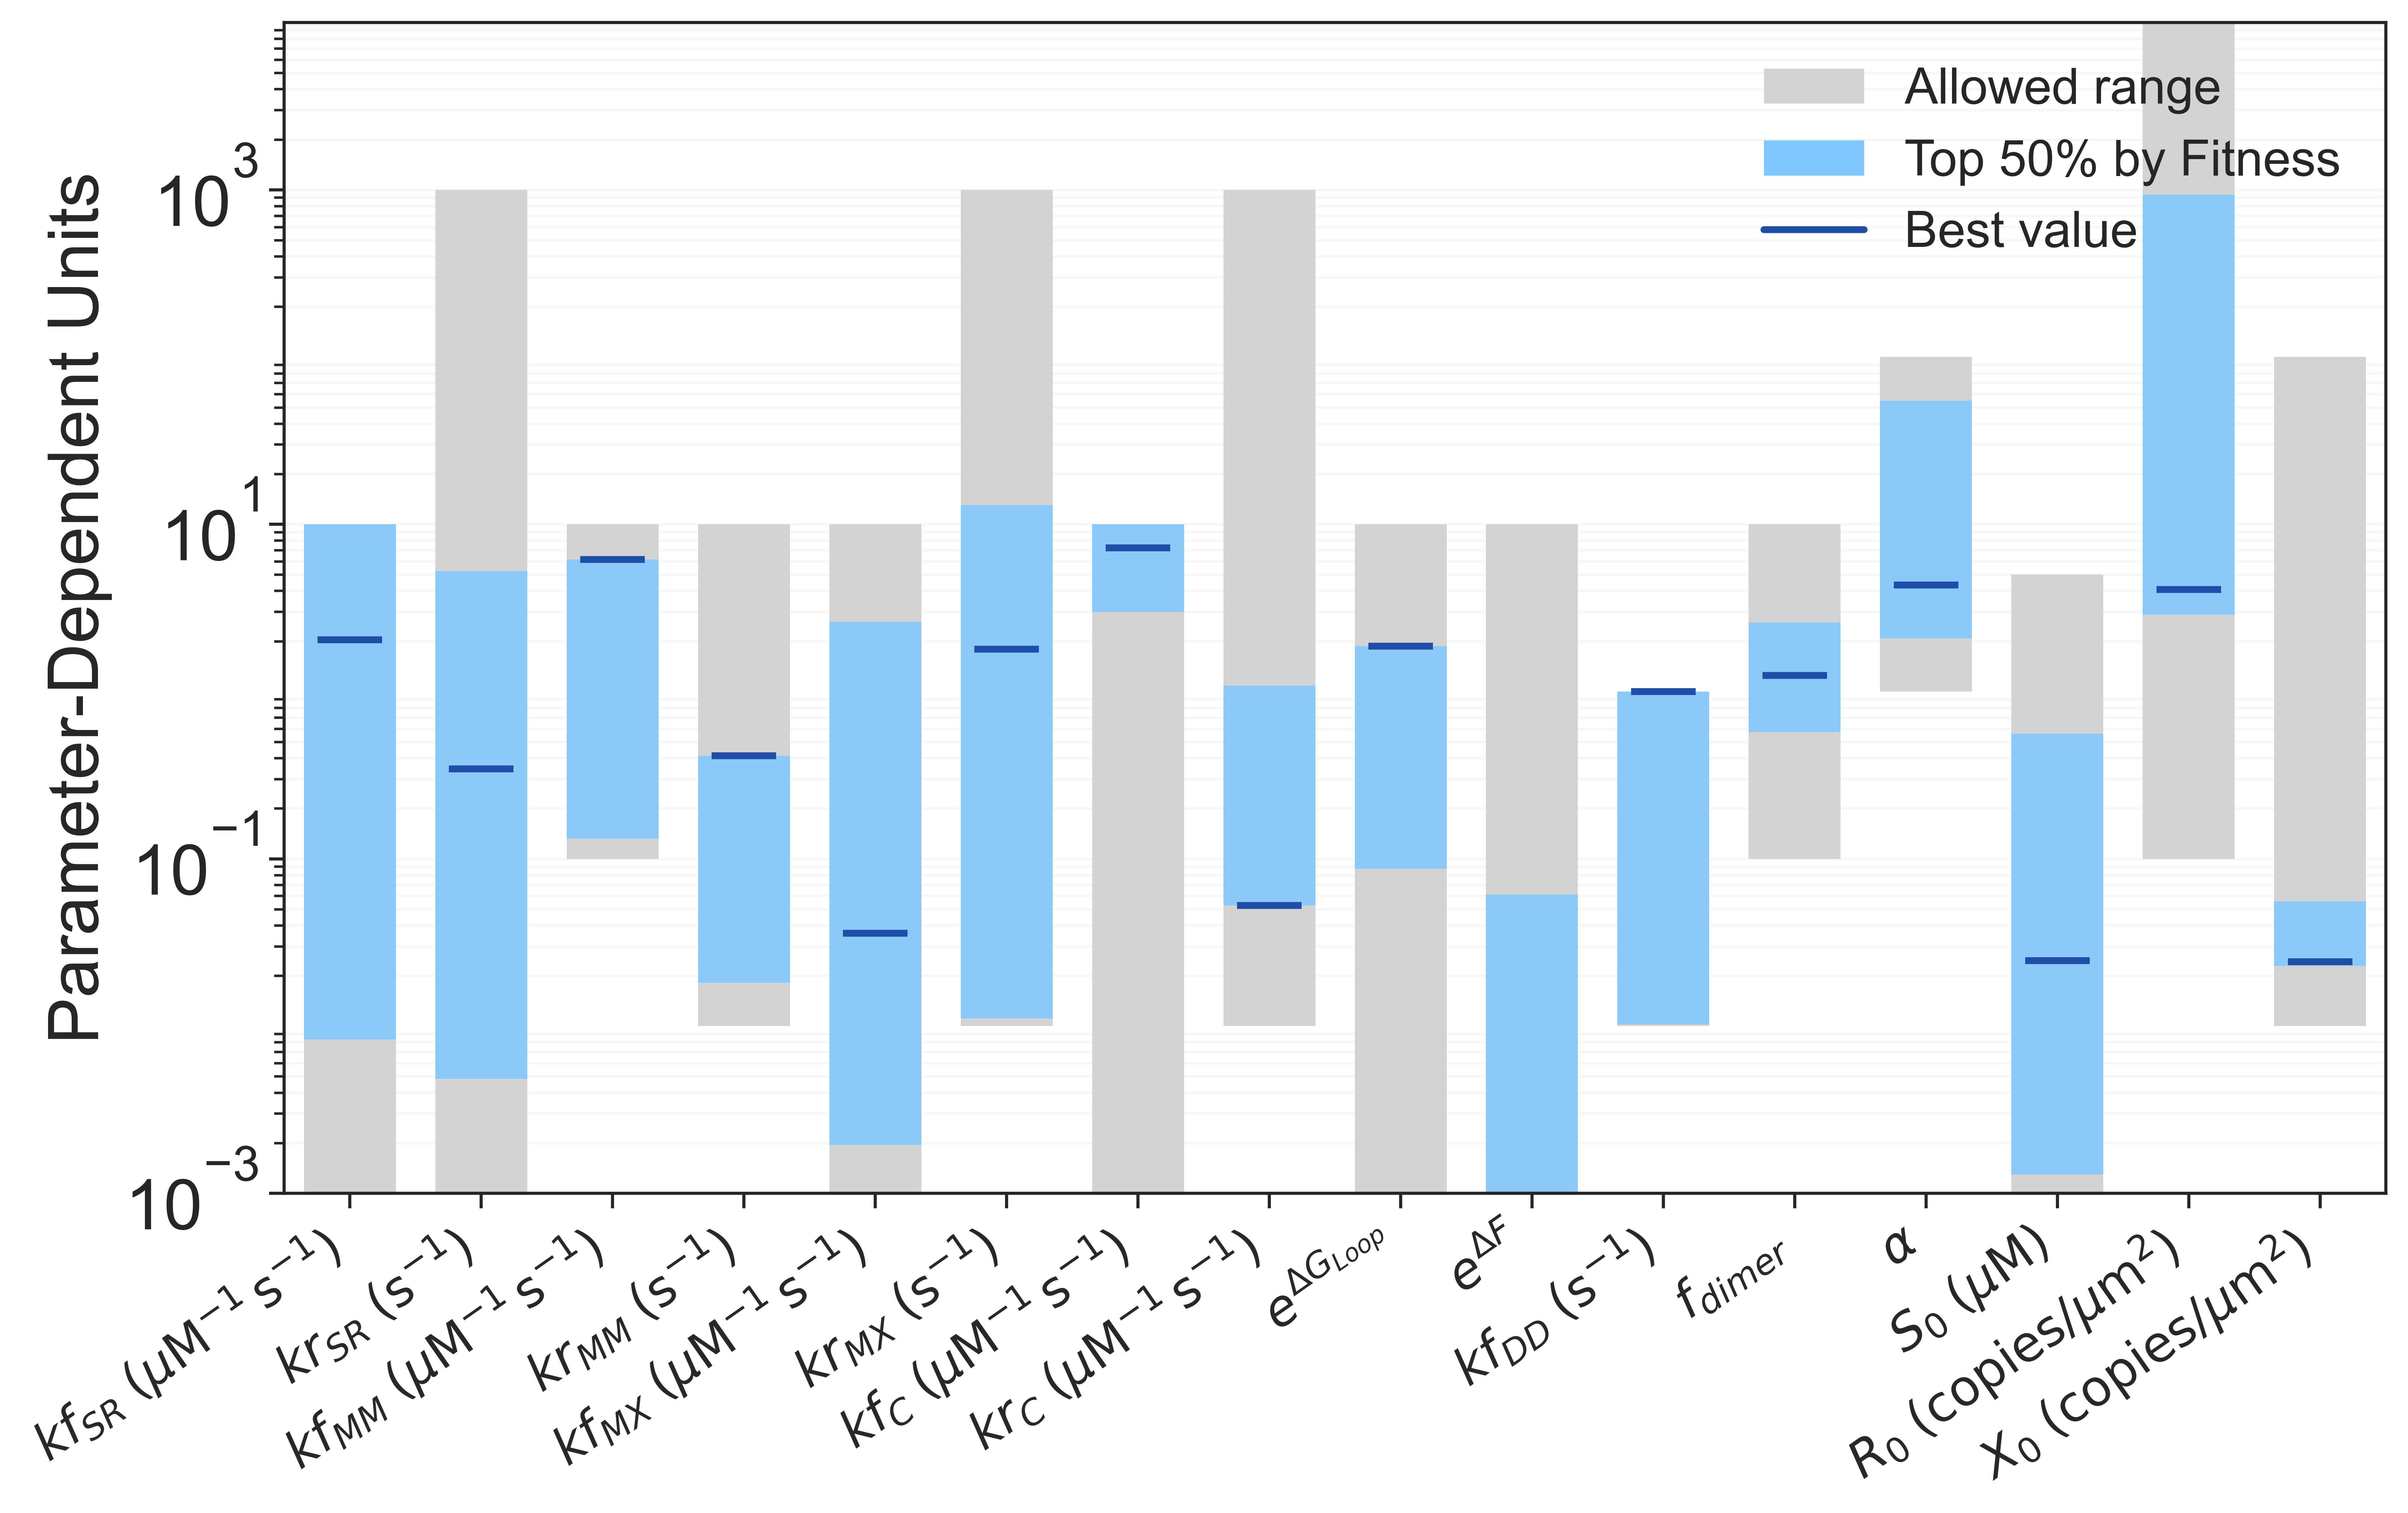

In [23]:
#edited plot_parameter_ranges_summary to exclude kfq, krq and Q0
model.plot_parameter_ranges_summary(parameter_ranges=filtered_ranges, percent=50, save_path=f"{imageDir}/sensitivityDterm_{unique_id}.png",inputFile=fileName)


Total solutions loaded: 17
Using top 50% by Fitness -> 8 solutions.
p:  kDsr
best_row        kDsr      kDmm       kDmx       kDc
0  0.168918  0.067073  49.923238  0.007279
p:  kDmm
best_row        kDsr      kDmm       kDmx       kDc
0  0.168918  0.067073  49.923238  0.007279
p:  kDmx
best_row        kDsr      kDmm       kDmx       kDc
0  0.168918  0.067073  49.923238  0.007279
p:  kDc
best_row        kDsr      kDmm       kDmx       kDc
0  0.168918  0.067073  49.923238  0.007279


/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2765: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2765: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2765: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2765: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), ti

Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/sensitivity_KD_Top11_101.png


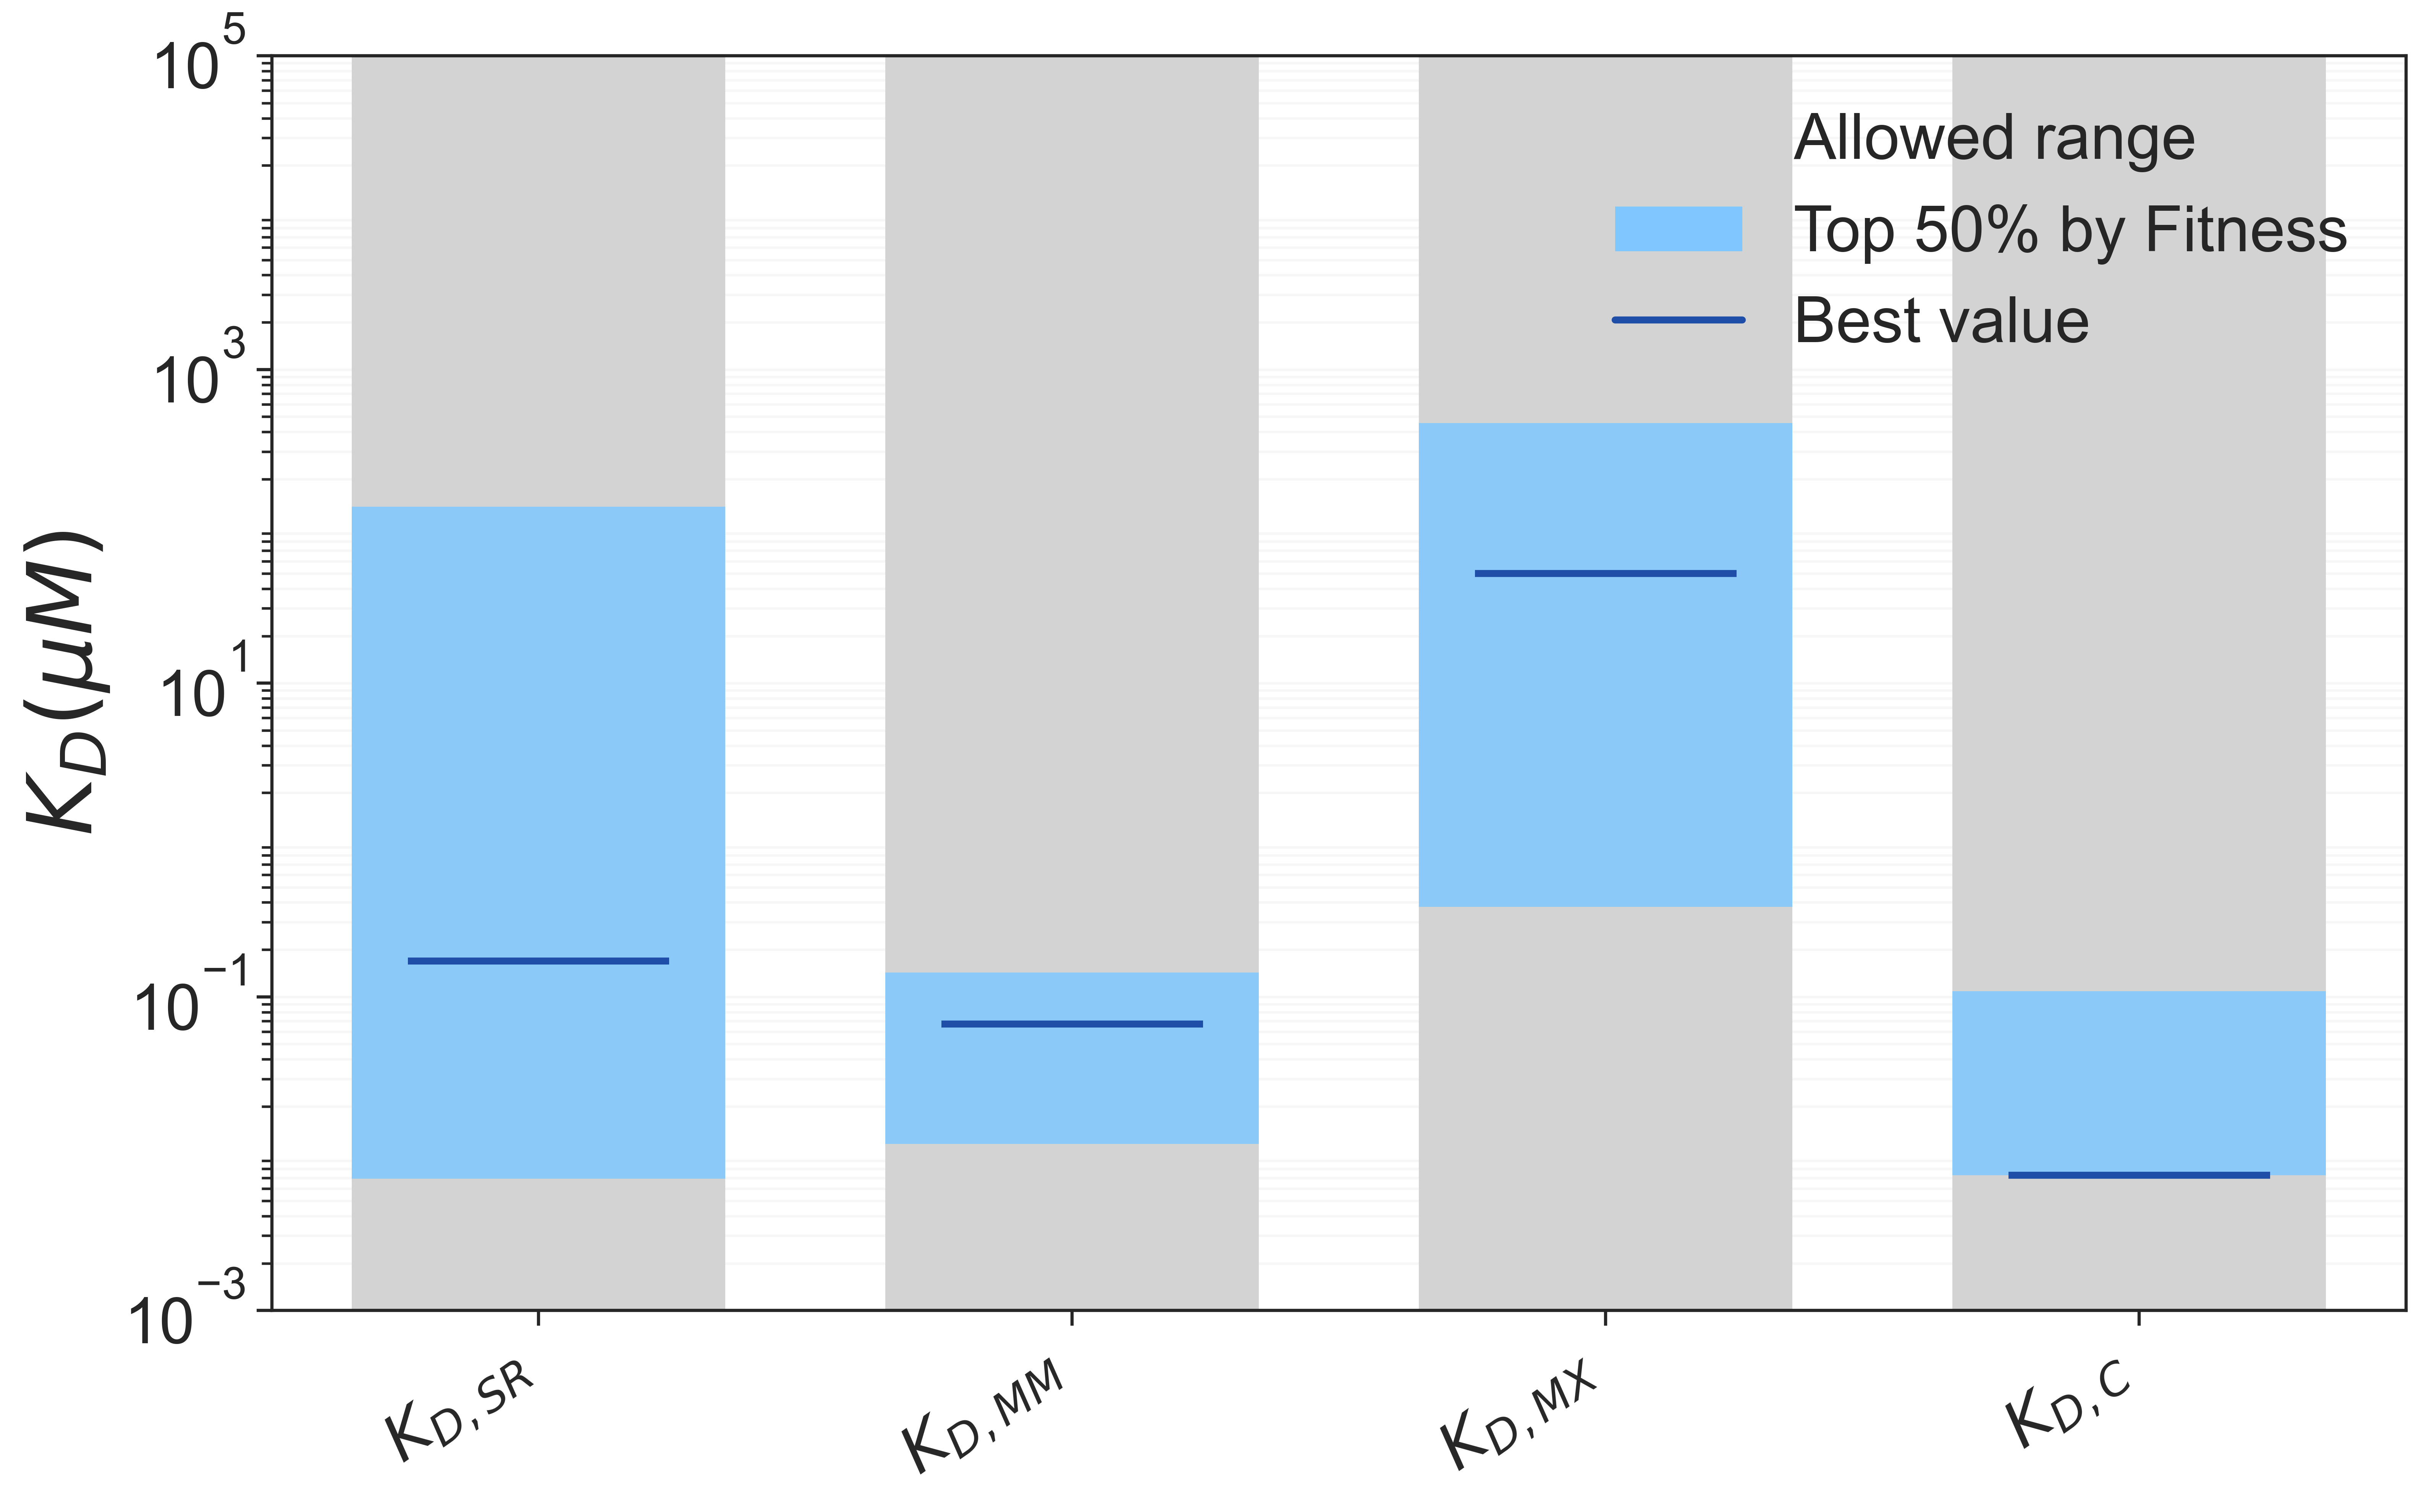

In [24]:
model.plot_parameter_KD_summary_noQ(percent=50, fontsize = 20, save_path=f"{imageDir}/sensitivity_KD_Top11_{unique_id}.png",inputFile=fileName)


# Now Lower total Munc13 density

In [25]:
#first make sure you go back to the original candidate
candidate=dataF[param_cols].iloc[whichRow].values
endo_candidate=list(candidate)
#change the munc13 concentration
endo_candidate[15]=endo_candidate[15]*0.1
#print(endo_candidate[15])
solOrig, solOrigPost=model.simulate(candidate)
sol, solPost=model.simulate(endo_candidate)


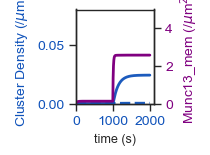

sizes pre stim, and sum:  [np.float64(0.7093182996514273), np.float64(0.2868235762993928), np.float64(0.002251485732144707)]
sizes POST stim, and sum:  [np.float64(0.24314435922027966), np.float64(0.7000841022215312), np.float64(0.056300911967009454)]


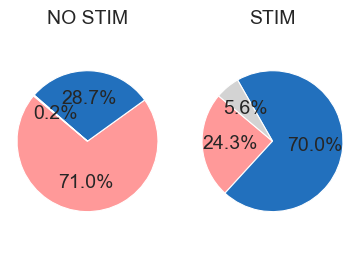

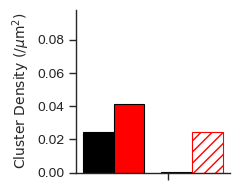

In [26]:
model.plot_time_resolved_density(sol, solPost,f"ENDO_{unique_id}_{whichRow}")
#create pie charts.
model.pie_charts(sol, solPost, [4,3], f"ENDO_{unique_id}_{whichRow}")
#plot cluster density as a bar plot
model.plot_density_vs_exp(sol, solPost, f"ENDO_{unique_id}_{whichRow}", whichExp='WT')

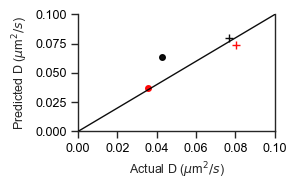

In [27]:
#plot diffusion, compare with WT overexpressed
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(endo_candidate)
#exp_endo_metrics = pd.DataFrame([metricsWT], columns=colWT)
#C2A_endo_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
D_endo_metrics = pd.DataFrame([metricsD], columns = colD)

fig, ax = plt.subplots(figsize=(3, 2))
D=D_endo_metrics['D'].iloc[0]
Dpost=D_endo_metrics['Dpost'].iloc[0]
DC2A=D_endo_metrics['C2AD'].iloc[0]
DC2Apost=D_endo_metrics['C2ADpost'].iloc[0]
ax.plot(model.D_exp_pre,D, markersize=4, marker='o', color='black', alpha=0.95, zorder=3)
ax.plot(model.D_exp_post,Dpost, markersize=4, marker='o', color='red', alpha=0.95, zorder=3)
ax.plot(model.D_exp_DC2A_pre,DC2A, markersize=6, marker='+', color='black', alpha=0.95, zorder=3)
ax.plot(model.D_exp_DC2A_post,DC2Apost, markersize=6, marker='+', color='red', alpha=0.95, zorder=3)
ax.plot(np.arange(0, 10)*0.1,np.arange(0, 10)*0.1, linewidth=1, ls='-', color='black', alpha=0.95, zorder=3)

ax.set_xlim(left=0, right=0.1)
ax.set_ylim(bottom=0, top=0.1)
ax.set_xlabel("Actual D ($\\mu$m$^2/s$)", fontsize=9)
ax.set_ylabel("Predicted D ($\\mu$m$^2/s$)", fontsize=9)
ax.tick_params(axis='both',labelcolor='black', labelsize=9)
#ax.set_xticks([0, 1000,2000])
# Get rid of bound box on the top.
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig(f"/Users/margaret/Dropbox/r2025/Munc13/IMAGES/Diffusion_ENDO_{unique_id}_{whichRow}.png",dpi=300)
plt.show()

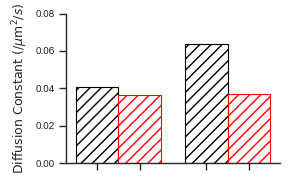

In [28]:
model.plot_diffusion_as_barplot(D_metrics['D'].iloc[0], D_metrics['Dpost'].iloc[0],D_endo_metrics['D'].iloc[0], D_endo_metrics['Dpost'].iloc[0], fileStr=f"_{unique_id}_{whichRow}_ENDO_both")

# make plots for lipid impairment

In [29]:
#now lower the kfsr, and also set the stimUp to 1. 
pip_candidate=list(candidate)
pip_candidate[0]=pip_candidate[0]*0.5 #kfsr
pip_candidate[14]=1.0 #stimUpSR
#R0 is [16]
#pip_candidate[16]=pip_candidate[16]*0.2

sol, solPost=model.simulate(pip_candidate)

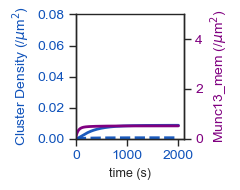

sizes pre stim, and sum:  [np.float64(0.44206028666706026), np.float64(0.4562165218893227), np.float64(0.09699584304643603)]
sizes POST stim, and sum:  [np.float64(0.44029429512148927), np.float64(0.45438524519214557), np.float64(0.10045370447783743)]


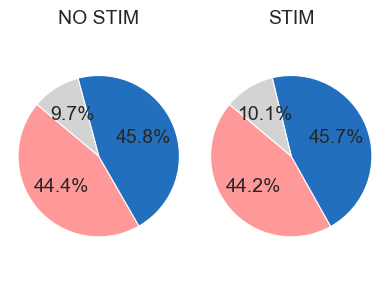

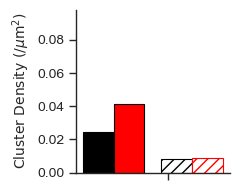

In [30]:
model.plot_time_resolved_density(sol, solPost,f"dPIP_{unique_id}_{whichRow}")
#create pie charts.
model.pie_charts(sol, solPost, [4,3], f"dPIP_{unique_id}_{whichRow}")
#plot cluster density as a bar plot
model.plot_density_vs_exp(sol, solPost, f"dPIP_{unique_id}_{whichRow}", whichExp='WT')

          D     Dpost      C2AD  C2ADpost
0  0.046861  0.046677  0.078053  0.078053


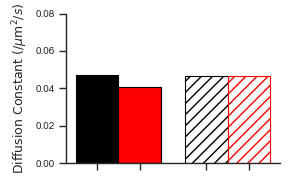

In [31]:
#plot diffusion, compare with WT overexpressed
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(pip_candidate)

D_pip_metrics = pd.DataFrame([metricsD], columns = colD)
print(D_pip_metrics)
#compare the EXP dC2B solution to the mutant.
model.plot_diffusion_as_barplot(model.D_exp_DC2B_pre, model.D_exp_DC2B_post,D_pip_metrics['D'].iloc[0], D_pip_metrics['Dpost'].iloc[0], fileStr=f"_{unique_id}_{whichRow}_dPIP", vsExp = True)

# evaluate what would happen if you increased X0    

In [32]:
candidate_dc2c=list(candidate)
#increase the amount of X0
scaleUp = 3

candidate_dc2c[17]=candidate[17]*scaleUp
sol, solPost=model.simulate(candidate_dc2c)

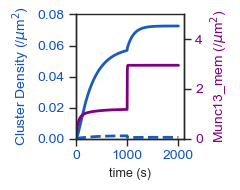

sizes pre stim, and sum:  [np.float64(0.2799618497437495), np.float64(0.42273168087065066), np.float64(0.29051545193887895)]
sizes POST stim, and sum:  [np.float64(0.21621349442934387), np.float64(0.6351223590292775), np.float64(0.1474662516343042)]


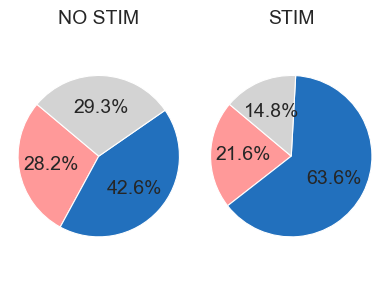

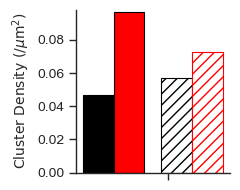

In [33]:
model.plot_time_resolved_density(sol, solPost,f"dC2C_{unique_id}_{whichRow}")
#create pie charts.
model.pie_charts(sol, solPost, [4,3], f"dC2C_{unique_id}_{whichRow}")
#plot cluster density as a bar plot
model.plot_density_vs_exp(sol, solPost, f"dC2C_{unique_id}_{whichRow}", whichExp='C2C')

          D     Dpost      C2AD  C2ADpost
0  0.033231  0.033308  0.061171  0.068001


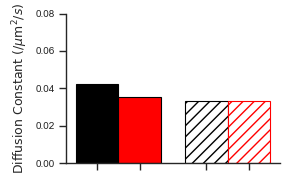

In [34]:
#plot diffusion, compare with WT overexpressed
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate_dc2c)

D_c2c_metrics = pd.DataFrame([metricsD], columns = colD)
print(D_c2c_metrics)
#compare the EXP dC2B solution to the mutant.
model.plot_diffusion_as_barplot(model.D_exp_pre, model.D_exp_post,D_c2c_metrics['D'].iloc[0], D_c2c_metrics['Dpost'].iloc[0], fileStr=f"_{unique_id}_{whichRow}_dC2C", vsExp = True)